In [2]:
import numpy as np
import datetime
import os
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.stats import chi
from scipy import stats

############
# Functions
############

# Generate n data for set of thetas
def theta_data(n, thetas, rand=1234):
    m1 = np.zeros(n)
    v1 = np.ones(n)
    m2 = mean_gen(thetas)
    v2 = var_gen(thetas)
    
    x1, y1 = np.transpose(np.array([np.random.normal(m1, v1, size=n), thetas])), np.zeros(n)
    x2, y2 = np.transpose(np.array([np.random.normal(m2, v2, size=n), thetas])), np.ones(n)
    x, y = np.append(x1, x2, axis=0), np.append(y1, y2, axis=0)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = rand)
    
    return x_train, x_test, y_train, y_test

def mean_gen(theta):
    mu = 0.5 - (np.sqrt(2)/2) * np.cos(theta + np.pi / 4)
    return mu

def var_gen(theta):
    v = 1.5 - (np.sqrt(2)/2) * np.sin(theta + np.pi / 4)
    return v

def discrete_thetas(n, m):
    xk = np.arange(m)
    pk = (1 / m) * np.ones(int(m))
    discrete_distr = stats.rv_discrete(name='discrete_distr', values=(xk, pk))
    thetas = discrete_distr.rvs(size=n) / (m / 6)
    return thetas

2022-06-16 12:22:39.235984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 12:22:39.236015: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Uniform Distribution of Thetas

n = 100000
rand_n = 1234
thetas = np.random.uniform(0, 2 * np.pi, n)

x_train, x_test, y_train, y_test = theta_data(n, thetas, rand_n)

In [4]:
# # Discrete Distribution of Thetas

# m = 12
# thetas = discrete_thetas(n, m)
# x_train, x_test, y_train, y_test = theta_data(n, thetas, rand_n)

In [ ]:
# Loading Models

models = []
models.append(tf.keras.models.load_model('models/interpolated_model_cont'))
models.append(tf.keras.models.load_model('models/interpolated_model_discrete12'))
models.append(tf.keras.models.load_model('models/interpolated_model_discrete6'))
models.append(tf.keras.models.load_model('models/interpolated_model_discrete3'))
models.append(tf.keras.models.load_model('models/theta2.5'))

# model2 = tf.keras.models.load_model('models/interpolated_model_discrete12')
# model3 = tf.keras.models.load_model('models/interpolated_model_discrete6')
# model4 = tf.keras.models.load_model('models/interpolated_model_discrete3')
# model5 = tf.keras.models.load_model('models/theta2.5')

predictions = []
for model in models:
    predictions.append(model(x_test).numpy())
# predictions1 = model1(x_test).numpy()
# predictions2 = model2(x_test).numpy()
# predictions3 = model3(x_test).numpy()
# predictions4 = model4(x_test).numpy()
# predictions5 = model5(x_test).numpy()

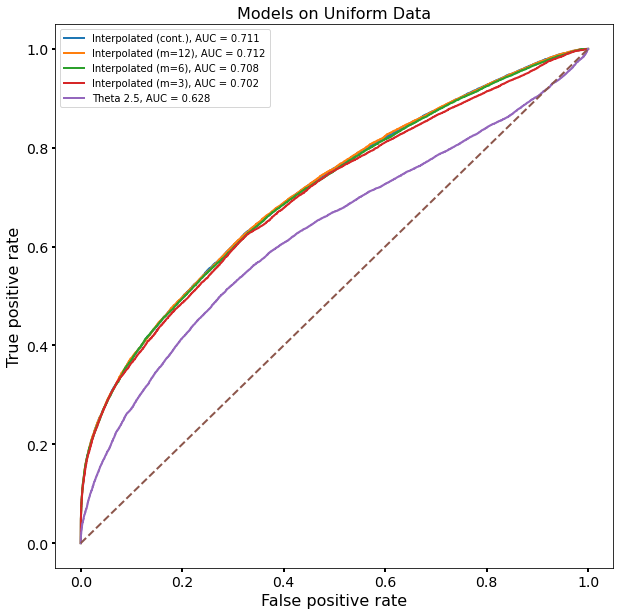

In [7]:
fig, ax1 = plt.subplots(figsize=(10,10))
fontsize=16
minor_size=14


fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions1)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='Interpolated (cont.), AUC = %.3f' % (auc))

fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions2)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='Interpolated (m=12), AUC = %.3f' % (auc))

fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions3)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='Interpolated (m=6), AUC = %.3f' % (auc))

fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions4)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='Interpolated (m=3), AUC = %.3f' % (auc))

fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions5)
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr, lw=2, label='Theta 2.5, AUC = %.3f' % (auc))

ax1.set_xlabel("Score")
ax1.plot([0, 1], [0, 1], '--', lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('Models on Uniform Data', fontsize=fontsize)
ax1.legend()
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)